In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Height,Weight,Age,Gender
0,170,65,30,1
1,165,59,25,0
2,180,75,35,1
3,175,68,28,1
4,160,55,22,0
5,172,70,32,1
6,168,62,27,0
7,177,74,33,1
8,162,58,24,0
9,158,54,21,0


In [5]:
X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

- We reduce the data from 3 features to 2 new features called principal components. These components capture most of the original information but in fewer dimensions.
- We split the data into 70% training and 30% testing sets.
- We train a logistic regression model on the reduced training data and predict gender labels on the test set.

In [6]:
pca = PCA(n_components=2)

In [9]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 0.90005784,  0.63516169],
       [-1.3998906 , -0.38005711],
       [ 2.88165429, -0.44045863],
       [ 1.24720863,  0.46035914],
       [-2.37553282,  0.15965573],
       [ 1.62063399,  0.25901251],
       [-0.7496539 , -0.73608984],
       [ 2.37324514, -0.1473138 ],
       [-1.79678422, -0.15360555],
       [-2.70093834,  0.34333585]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42
)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)

The confusion matrix compares actual vs predicted labels. This makes it easy to see where predictions were correct or wrong.




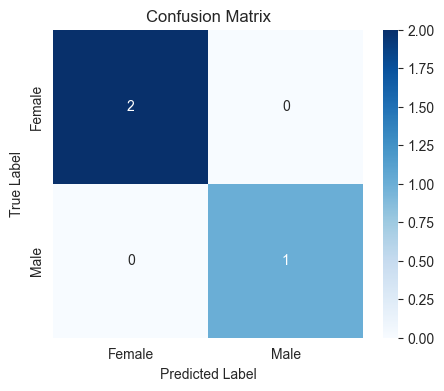

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Female', 'Male'],
    yticklabels=['Female', 'Male'],
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

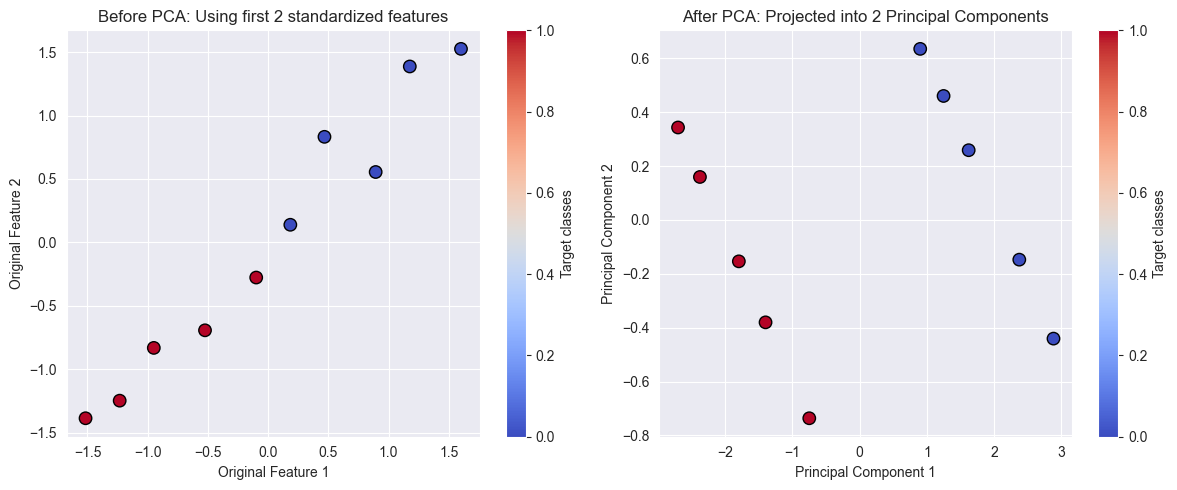

In [15]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s= 80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using first 2 standardized features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected into 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

- Left Plot Before PCA: This shows the original standardized data plotted using the first two features. There is no guarantee of clear separation between classes as these are raw input dimensions.
- This displays the transformed data using the top 2 principal components. These new components capture the maximum variance often showing better class separation and structure making it easier to analyze or model.